In [1]:
from __future__ import print_function
print("hello world")


hello world


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

In [3]:
data = pd.read_csv("python1.csv")

In [18]:
table = pd.pivot_table(data, columns=['习题序号'], values=['答题时间', '是否正确\n（1：正确 0：错误）'],
                    index=['学员姓名'], fill_value=0)
#,aggfunc={'答题时间': np.sum, '是否正确\n（1：正确 0：错误）': np.sum}, margins=True)
# table[table['答题时间'] < 48
table.head()

是否正确\n（1：正确 0：错误）          答题时间              
习题序号                        1  2  3  5    1   2    3    5
学员姓名                                                     
15810247868                 1  1  1  1    7  17   15  534
Aimee                       1  1  1  1   16  64  155  155
Andy                        1  1  1  1   53  58  100  166
Anna                        1  1  1  1    7   5   12   17
August.Li                   1  1  1  1   22  31  228  376

In [19]:
table.columns = ['{}_{}'.format(j, i) for i, j in table.columns]

In [31]:
# data manipulations:

table['T1'] = np.where(table['1_答题时间'] > 480, 0, table['1_答题时间'])

table['A1'] = np.where(table['T1'] >0 , table['1_是否正确\n（1：正确 0：错误）'], 0)

conditions = (table['T1']+table['2_答题时间'] > 480) | (table['T1'] == 0)

table['T1+T2'] = np.where( conditions, 0, table['T1']+table['2_答题时间'])

conditions = (table['T1+T2']> 0) & (table['T1+T2'] <= 480)

table['A1+A2'] = np.where(conditions, table['A1']+table['2_是否正确\n（1：正确 0：错误）'], 0)

conditions = (table['T1+T2'] == 0) | (table['T1+T2']+table['3_答题时间'] > 480)

table['T1+T2+T3'] = np.where(conditions, 0, table['T1+T2']+table['3_答题时间'])

conditions = table['T1+T2+T3'] > 0

table['A1+A2+A3'] = np.where(conditions , table['A1+A2']+table['3_是否正确\n（1：正确 0：错误）'], 0)

conditions = (table['T1+T2+T3'] == 0) | (table['T1+T2+T3']+ +table['5_答题时间'] > 480)

table['T1+T2+T3+T5'] = np.where(conditions , 0, table['T1+T2+T3']+table['5_答题时间'])

conditions = table['T1+T2+T3+T5'] > 0

table['A1+A2+A3+A5'] = np.where(conditions , table['A1+A2+A3']+table['5_是否正确\n（1：正确 0：错误）'], 0)

table.head()

,1_是否正确\n（1：正确 0：错误）,2_是否正确\n（1：正确 0：错误）,3_是否正确\n（1：正确 0：错误）,5_是否正确\n（1：正确 0：错误）,1_答题时间,2_答题时间,3_答题时间,5_答题时间,T1,A1,...,A1+A2,T1+T2+T3,A1+A2+A3,T1+T2+T3+T5,A1+A2+A3+A5,TF,AF,TF/TG,AF/4,加权首答正确率
学员姓名,,,,,,,,,,,,,,,,,,,,,
15810247868,1,1,1,1,7,17,15,534,7,1,...,2,39,3,0,0,39,3,0.081250,0.75,0.060938
Aimee,1,1,1,1,16,64,155,155,16,1,...,2,235,3,390,4,390,4,0.812500,1.00,0.812500
Andy,1,1,1,1,53,58,100,166,53,1,...,2,211,3,377,4,377,4,0.785417,1.00,0.785417
Anna,1,1,1,1,7,5,12,17,7,1,...,2,24,3,41,4,41,4,0.085417,1.00,0.085417
August.Li,1,1,1,1,22,31,228,376,22,1,...,2,281,3,0,0,281,3,0.585417,0.75,0.439063


In [32]:
table['TF'] = table[['T1','T1+T2','T1+T2+T3','T1+T2+T3+T5']].max(axis=1)
table['AF'] = table[['A1','A1+A2','A1+A2+A3','A1+A2+A3+A5']].max(axis=1)
table['TF/TG'] = table['TF']/480
table['AF/4'] = table['AF']/4
table['加权首答正确率'] = table['TF/TG']*table['AF/4']
print(table)

             1_是否正确\n（1：正确 0：错误）  2_是否正确\n（1：正确 0：错误）  3_是否正确\n（1：正确 0：错误）  \
学员姓名                                                                         
15810247868                    1                    1                    1   
Aimee                          1                    1                    1   
Andy                           1                    1                    1   
Anna                           1                    1                    1   
August.Li                      1                    1                    1   
...                          ...                  ...                  ...   
黎辰骏                            1                    1                    1   
齐景民                            1                    1                    1   
龙宇轩                            1                    1                    1   
龚亮                             1                    1                    1   
龚歆奕                            1                    1           

(0.0, 1.0)

<Figure size 3600x720 with 0 Axes>

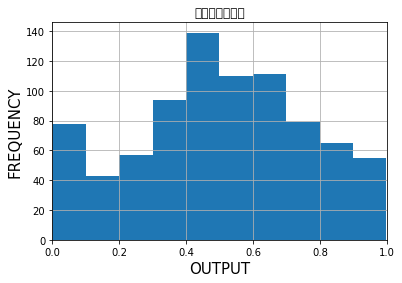

In [37]:
fig = plt.figure(figsize=(50,10))
table.hist(column="加权首答正确率", bins=10)
plt.xlabel("OUTPUT",fontsize=15)
plt.ylabel("FREQUENCY",fontsize=15)
plt.xlim([0.0,1.0])

In [35]:
table.sort_values(by=['加权首答正确率'], ascending=False)

,1_是否正确\n（1：正确 0：错误）,2_是否正确\n（1：正确 0：错误）,3_是否正确\n（1：正确 0：错误）,5_是否正确\n（1：正确 0：错误）,1_答题时间,2_答题时间,3_答题时间,5_答题时间,T1,A1,...,A1+A2,T1+T2+T3,A1+A2+A3,T1+T2+T3+T5,A1+A2+A3+A5,TF,AF,TF/TG,AF/4,加权首答正确率
学员姓名,,,,,,,,,,,,,,,,,,,,,
刘宇琦,1,1,1,1,108,60,107,204,108,1,...,2,275,3,479,4,479,4,0.997917,1.0,0.997917
李宸睿,1,1,1,1,85,140,83,170,85,1,...,2,308,3,478,4,478,4,0.995833,1.0,0.995833
肖奕恩,1,1,1,1,29,174,106,167,29,1,...,2,309,3,476,4,476,4,0.991667,1.0,0.991667
孙子涵（北京）,1,1,1,1,51,101,117,207,51,1,...,2,269,3,476,4,476,4,0.991667,1.0,0.991667
郭旆铨,1,1,1,1,51,96,134,194,51,1,...,2,281,3,475,4,475,4,0.989583,1.0,0.989583
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
廖婧雯,1,1,0,0,719,66,453,445,0,0,...,0,0,0,0,0,0,0,0.000000,0.0,0.000000
叶浩然,0,1,1,1,0,133,212,166,0,0,...,0,0,0,0,0,0,0,0.000000,0.0,0.000000
赵启元,1,1,1,1,747,124,149,206,0,0,...,0,0,0,0,0,0,0,0.000000,0.0,0.000000
